In [1]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached holidays-0.17-py3-none-any.whl (187 kB)


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('df.xlsx')

In [4]:
#подсчет скользящей средней rolling
#окно которое мы задаем window
df.rolling(window=20).mean()

C:\Users\st\AppData\Local\Temp\ipykernel_8196\124877091.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  df.rolling(window=20).mean()


,y
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
272,15109.20
273,15070.20
274,15013.20
275,14915.85


C:\Users\st\AppData\Local\Temp\ipykernel_8196\3806550671.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  df.rolling(window=20).mean().plot()


<AxesSubplot:>

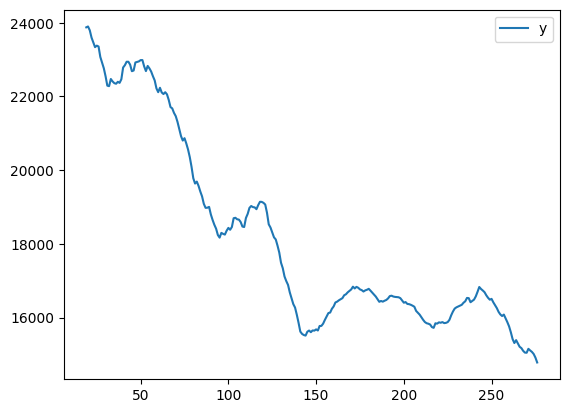

In [5]:
df.rolling(window=20).mean().plot()

In [6]:
# расчет экспоненциального сглаживания
#span - значение альфа
df.ewm(span=2).mean()

C:\Users\st\AppData\Local\Temp\ipykernel_8196\2693679383.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  df.ewm(span=2).mean()


,y
0,19644.000000
1,21812.250000
2,23875.846154
3,24240.450000
4,24581.553719
...,...
272,14773.607276
273,14241.869092
274,13967.289697
275,13624.429899


In [7]:
# Импортируем либы
import pandas as pd
import numpy as np
from datetime import date
from prophet import Prophet
import holidays # справочник 

C:\Users\st\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# белорусские праздники
holidays_dict = holidays.BLR(years=(2019, 2020, 2021))
holidays_dict

{datetime.date(2019, 1, 1): 'Новый год', datetime.date(2019, 1, 7): 'Рождество Христово (православное Рождество)', datetime.date(2019, 3, 8): 'День женщин', datetime.date(2019, 5, 7): 'Радуница', datetime.date(2019, 5, 1): 'Праздник труда', datetime.date(2019, 5, 9): 'День Победы', datetime.date(2019, 7, 3): 'День Независимости Республики Беларусь (День Республики)', datetime.date(2019, 11, 7): 'День Октябрьской революции', datetime.date(2019, 12, 25): 'Рождество Христово (католическое Рождество)', datetime.date(2020, 1, 1): 'Новый год', datetime.date(2020, 1, 2): 'Новый год', datetime.date(2020, 1, 7): 'Рождество Христово (православное Рождество)', datetime.date(2020, 3, 8): 'День женщин', datetime.date(2020, 4, 28): 'Радуница', datetime.date(2020, 5, 1): 'Праздник труда', datetime.date(2020, 5, 9): 'День Победы', datetime.date(2020, 7, 3): 'День Независимости Республики Беларусь (День Республики)', datetime.date(2020, 11, 7): 'День Октябрьской революции', datetime.date(2020, 12, 25):

In [9]:
# Вкидываем праздники, для их учёта моделькой
holidays_dict = holidays.RU(years=(2019, 2020, 2021))
df_holidays = pd.DataFrame.from_dict(holidays_dict, orient='index') \
    .reset_index()
df_holidays = df_holidays.rename({'index':'ds', 0:'holiday'}, axis ='columns')
df_holidays['ds'] = pd.to_datetime(df_holidays.ds)
df_holidays = df_holidays.sort_values(by=['ds'])
df_holidays = df_holidays.reset_index(drop=True)
df_holidays

,ds,holiday
0,2019-01-01,Новый год
1,2019-01-02,Новый год
2,2019-01-03,Новый год
3,2019-01-04,Новый год
4,2019-01-05,Новый год
5,2019-01-06,Новый год
6,2019-01-07,Православное Рождество
7,2019-01-08,Новый год
8,2019-02-23,День защитника отечества
9,2019-03-08,День женщин


<AxesSubplot:>

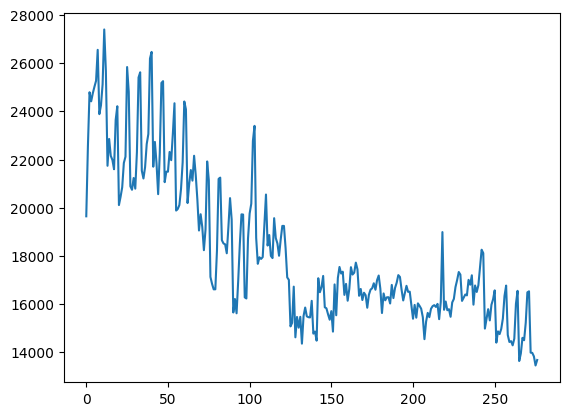

In [10]:
df.y.plot()

In [11]:
# Период, который надо отрезать и предсказать (проверка модели)
predictions = 30



# Отрезаем из обучающей выборки последние N точек, чтобы измерить на них качество
train_df = df[:-predictions]

In [12]:
train_df

,ds,y
0,2019-01-01,19644
1,2019-01-02,22535
2,2019-01-03,24793
3,2019-01-04,24416
4,2019-01-05,24750
...,...,...
242,2019-08-31,18257
243,2019-09-01,18117
244,2019-09-02,14984
245,2019-09-03,15396


In [13]:
#обучаем нашу модель
m = Prophet()
m.fit(train_df)

21:48:45 - cmdstanpy - INFO - Chain [1] start processing
21:48:45 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# Настраиваем prophet – говорим ему учитывать праздники и сезонности
m = Prophet(holidays=df_holidays, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
m.fit(train_df)

21:48:45 - cmdstanpy - INFO - Chain [1] start processing
21:48:45 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# Предсказываем 30 дней
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

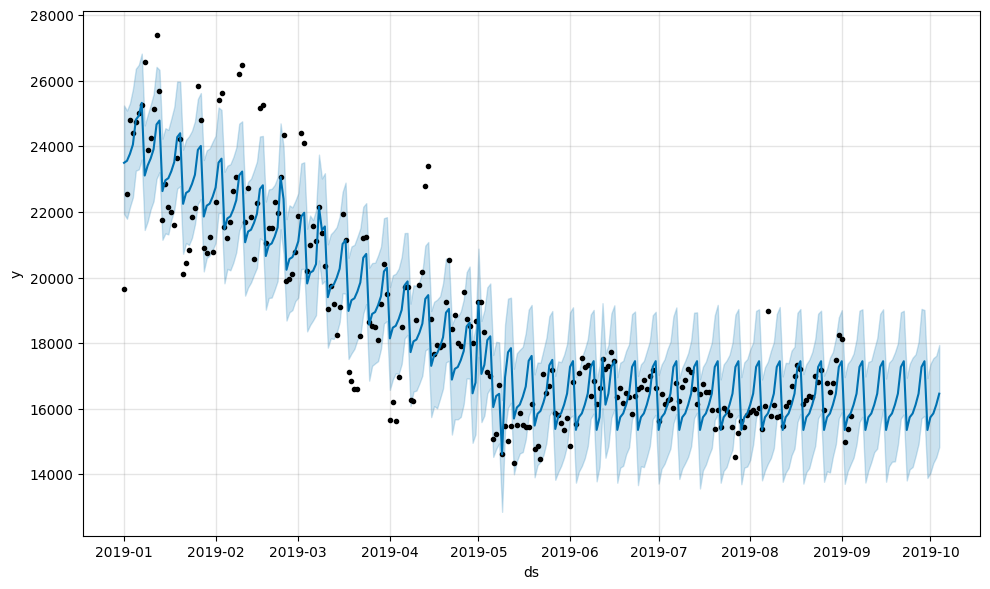

In [16]:
# Смотрим, что предсказалось
m.plot(forecast);

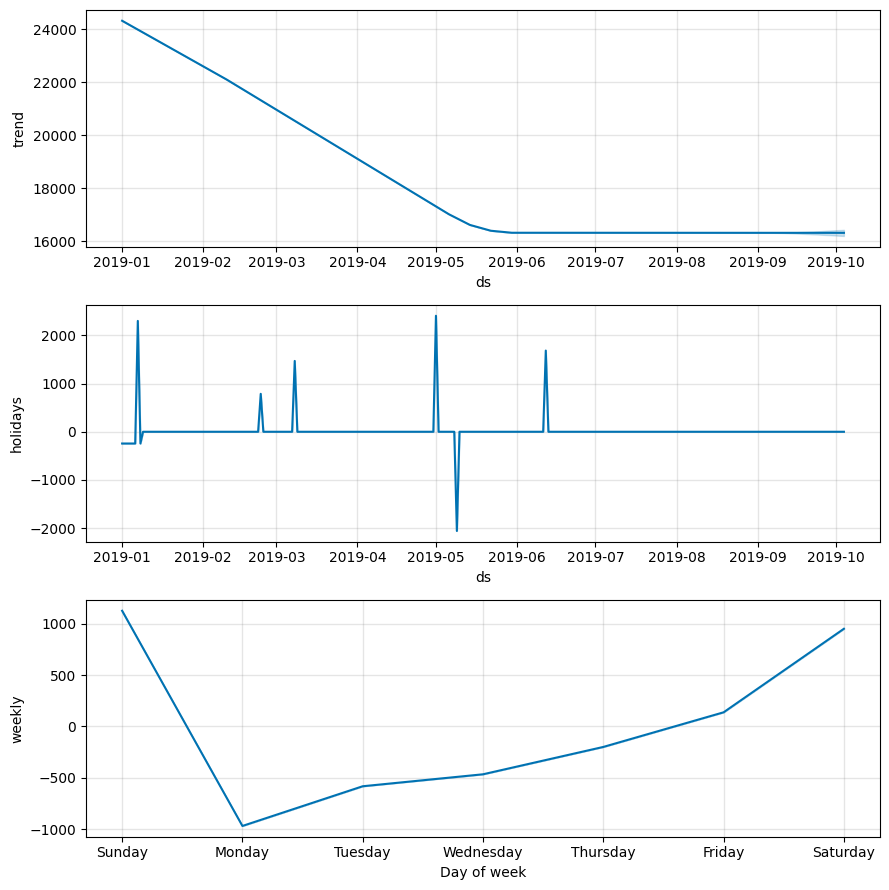

In [17]:
# Смотрим на сезонности
m.plot_components(forecast);

In [18]:
# Рисуем график с границами прогноза
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)



iplot([
    go.Scatter(x=df['ds'], y=df['y'], name='fact'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='prediction'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='trend')
])

In [19]:
# Смотрим на ошибки модели
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE (средняя абсолютная ошибка в процентах) – ', np.mean(abs(cmp_df[-predictions:]['p'])),'%')
print('MAE (средняя абсолютная ошибка) – ', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE (средняя абсолютная ошибка в процентах) –  8.920122210785845 %
MAE (средняя абсолютная ошибка) –  1305.4194761506426


In [20]:
# Прогнозируем на полный период (указываем количество дней)
prediction_days = 90
final_train_df = df
f = Prophet(holidays=df_holidays, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
f.fit(final_train_df)
final_future = f.make_future_dataframe(periods=prediction_days)
final_forecast = f.predict(final_future)

21:48:49 - cmdstanpy - INFO - Chain [1] start processing
21:48:49 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
final_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,Православное Рождество,Православное Рождество_lower,Православное Рождество_upper,Праздник Весны и Труда,Праздник Весны и Труда_lower,Праздник Весны и Труда_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,24419.946992,21943.266533,24996.294488,24419.946992,24419.946992,-928.117492,-928.117492,-928.117492,-341.499631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23491.829500
1,2019-01-02,24361.287477,22060.387101,25080.065082,24361.287477,24361.287477,-805.406269,-805.406269,-805.406269,-341.499631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23555.881208
2,2019-01-03,24302.627962,22030.572215,25187.530635,24302.627962,24302.627962,-596.861046,-596.861046,-596.861046,-341.499631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23705.766916
3,2019-01-04,24243.968447,22360.324702,25617.122946,24243.968447,24243.968447,-241.245787,-241.245787,-241.245787,-341.499631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24002.722660
4,2019-01-05,24185.308932,23327.296817,26454.342738,24185.308932,24185.308932,637.189804,637.189804,637.189804,-341.499631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24822.498736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2019-12-29,14342.279421,13864.086492,17172.262900,13758.538702,14851.837711,1175.747854,1175.747854,1175.747854,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15518.027275
363,2019-12-30,14330.820148,11670.482868,15078.048630,13733.898695,14850.431493,-948.805219,-948.805219,-948.805219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13382.014928
364,2019-12-31,14319.360874,11653.264125,15055.964973,13711.280154,14853.448976,-928.117492,-928.117492,-928.117492,-341.499631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13391.243382
365,2020-01-01,14307.901601,11936.421817,15161.292475,13688.676014,14853.964450,-805.406269,-805.406269,-805.406269,-341.499631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13502.495332


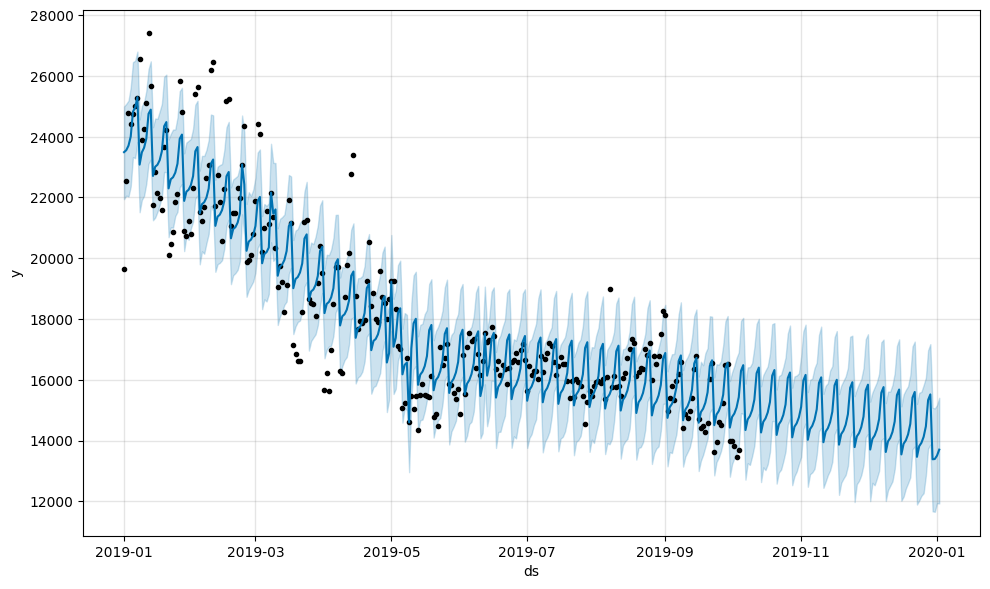

In [22]:
# Смотрим, что предсказалось на полный период
f.plot(final_forecast);

In [23]:
# Рисуем график с границами прогноза на полном периоде
iplot([
    go.Scatter(x=df['ds'], y=df['y'], name='fact'),
    go.Scatter(x=final_forecast['ds'], y=final_forecast['yhat'], name='yhat'),
    go.Scatter(x=final_forecast['ds'], y=final_forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=final_forecast['ds'], y=final_forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=final_forecast['ds'], y=final_forecast['trend'], name='trend')
])

In [24]:
# Выгружаем прогноз в эксельку. Спрогнозированное значение лежит в столбце yhat
final_forecast.to_excel("./app_forecast.xlsx", sheet_name='Data', index=False, encoding="cp1251")